In [1]:
#통계의 목적에 따른 분류
#1. 기술통계 (Descriptive Statistics)
#주어진 정보를 요약, 설명, 분석하는 통계 기법
#Pandas(EDA - 탐색적 데이터 분석)
#평균(대표값), 분산(데이터의 분포)

#2. 추리통계(Inferential Statistics)
#수집한 데이터를 기반으로 어떠한 사실을 예측, 검정하는 통계기법
#통계적 가설 검증 - 표본으로부터 얻은 사실을 근간으로 가설이 맞는지 검증.
#    1) 가설 수립. 
#    - H0 귀무가설 (Null Hypothesis) : 진실일 가능성이 적어서 거부가 예상되는 가설
#        관계가 없다, 영향력이 없다, 관련이 없다. 로 정의되는 가설. 
#        채택되기를 원하는 가설이 아님. reject가 되기를 기대하는 가설. 
#        작년과 올해의 월급이 같다
#    - H1 대립가설(Alternative Hypothesis): 
#        관계가 있다. 영향력이 있다. 통계 기반 증명, 채택되기를 원하는 가설. 
#        작년과 올해의 월급이 달라(올해가 더 커)


#    -임계값(Critical Value) : 유의 수준을 이용해서 도출 귀무가설 체택 여부 결정 기준. 
#    -유의 수준(level of significance) : 95%확률로 검정. 유의수준 0.05 




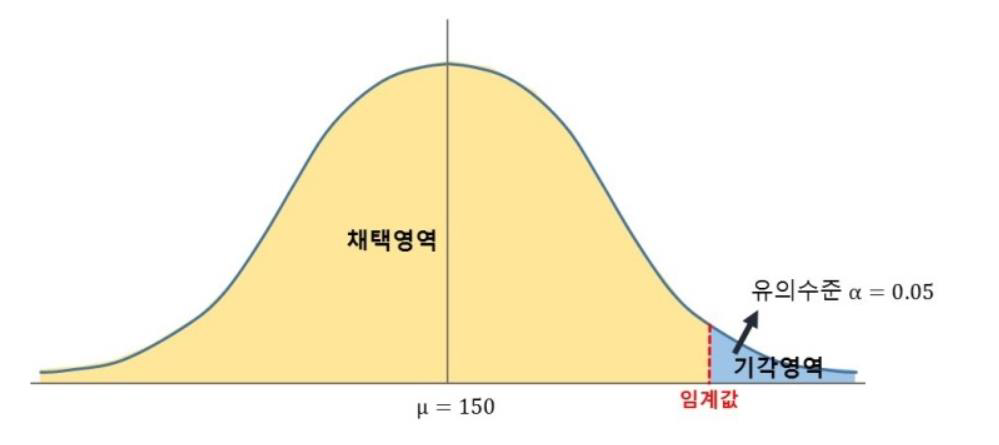

In [2]:
#귀무가설이 기각되면 대립가설이 채택되고 , 내가 주장하는바가 맞다 증명 된다. 
#채택과 기각은 귀무 가설을 기준으로 결정한다. 
#그래프 초기에는 전체가 귀무가설 영역 
#0.1, 0.05(95% 여론조사), 0.01 (99% 학술)

# 신뢰수준이 올라가면 귀무가설 채택될 확률이 높아진다. 

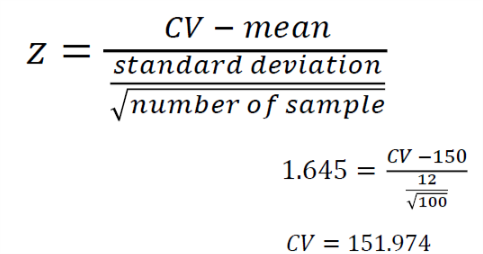

In [3]:
import math
z = 1.28
SD = 10
Sqrt_num_S = math.sqrt(30)
mean = 75
CV = z *SD/ Sqrt_num_S + 75
result = 79
if result < CV:
    print("귀무가설 채택")
else:
    print("대립가설 채택")

대립가설 채택


In [4]:
#1. 가설을 정의
# 귀무가설 
HO = "평균 수명은 변화가 없다."
#대립가설
H1 = "평균수명이 더 증가했다. "

last_mean = 75
last_std = 10
num_of_sample = 30
mean_of_sample = 79
z = 1.28 #alpha = 0.1
#z = (CV - mean ) / std/ squr(사람 수)

#CV = z * (std / sqrt(num_of_sample)) + last_mean
import numpy as np
CV = z * (last_std/ np.sqrt(num_of_sample)) + last_mean
CV

if mean_of_sample>CV:
    print(H1)
else:
    print(H0)

평균수명이 더 증가했다. 


In [5]:
#Explicit 한계 : 프로그래밍이 명확해야함. 
#데이터마이닝은 통계 기법을 통해 유용한 정보 도출
#머신러닝 파라미터 값을 자체적으로 다시 도출
#로지스틱이 가장 중요한 분류 기법
#분류형 어떤 분류에 속하니
#cf. 성능을 끌어올리려면 파라메터를 어떻게 도출해내야 하느냐. 

#데이터 전처리 

#통계적 가설검정 : 입력 파라메터 간의 연관 분석시. 

In [6]:
#통계적 가설 검증
#1. 표본을 통해서 모집단의 특성을 유추
#2. 머신러닝을 할 때 필요한 파라메터를 분류해서 사용.
#    필요 없는 것은 버리고 서로 연관성이 있는 파라메터만 머신러닝에 입력


In [7]:
#카이제곱검정
#자유도 분류n-1

In [6]:
H0 = "흡연과 주량은 연관성이 없다. "
H1 = "흡연과 주량은 연관성이 있다. "

import pandas as pd

df = pd.DataFrame([[23, 21, 63]
             ,[31, 48, 159]
             ,[13, 23, 119]], columns = ["1갑 이상","1갑 이하","안피움"]
            , index = ["반 병 이상","반 병 이하", "안마심"])
df

,1갑 이상,1갑 이하,안피움
반 병 이상,23,21,63
반 병 이하,31,48,159
안마심,13,23,119


In [18]:
df["개(열)"] = df["1갑 이상"] + df["1갑 이하"] + df["안피움"]
df.loc["개(행)"] = df.select_dtypes(pd.np.number).sum()

# # select numeric columns and calculate the sums
# sums = df.select_dtypes(pd.np.number).sum().rename('total')

# # append sums to the data frame
# df.append(sums)
df

,1갑 이상,1갑 이하,안피움,개(열)
반 병 이상,23,21,63,107
반 병 이하,31,48,159,238
안마심,13,23,119,155
개(행),134,184,682,1000


In [8]:
#Expected value

def EV (i,j):
    EV_R = df.iloc[i,-1]/df.iloc[-1,-1]
    *df.iloc[-1,j]/df.iloc[-1,-1]
    return EV_R*500

EV(0,1)

19.688

In [11]:
df.shape

(4, 4)

In [17]:
import numpy as np

EV_list = list()
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        EV_list.append(EV(i,j))
#arr = np.array(EV_list).reshape(4,4)
EV_df = pd.DataFrame(EV_list, index = [0,1,2,3], columns=[0,1,2,3])
#EV_df = pd.DataFrame([[EV(0,0),EV(0,1),EV(0,2)]
#                     ,[EV(1,0),EV(1,1),EV(1,2)]
#                    ,[EV(2,0),EV(2,1),EV(2,2)]])
EV_df

ValueError: Shape of passed values is (16, 1), indices imply (4, 4)

In [12]:
def chi(i,j):
    chi_R = (df.iloc[i,j]-EV(i,j))**2/EV(i,j)
    return chi_R
Chi_df = pd.DataFrame([[chi(0,0),chi(0,1),chi(0,2)]
                     ,[chi(1,0),chi(1,1),chi(1,2)]
                     ,[chi(2,0),chi(2,1),chi(2,2)]])

Chi_df

,0,1,2
0,5.232964,0.087431,1.363235
1,0.024949,0.404349,0.067744
2,2.906736,1.068387,1.670836


In [13]:
Chi_df["개(열)"] = Chi_df[0] + Chi_df[1] + Chi_df[2]
Chi_df.loc["개(행)"] = Chi_df.select_dtypes(pd.np.number).sum()
Chi_df.iloc[-1,-1]

12.826630603041854

In [15]:
degree_of_fredom= (Chi_df.shape[0]-2)*(Chi_df.shape[1]-2)

4

In [2]:
from scipy import stats

arr = ([[23, 21, 63]
        ,[31, 48, 159]
        ,[13, 23, 119]])

chi2, pvalue, free,_table = stats.chi2_contingency(arr)
print("카이제곱값:{}".format(chi2))
print("pvalue:{}".format(pvalue))
print("자유도:{}".format(free))
      
if pvalue<0.05:
      print("accept 대립가설")
else:
      print("reject 대립가설")

카이제곱값:12.826630603041854
pvalue:0.012154721873148373
자유도:4
accept 대립가설


In [1]:
##통계
#1. 가지고 있는 데이터를 분석해서 해당 데이터를 요약, 특정한 사실을 이끌어내는 통계 기법
#기술통계 EDA
#2. 수집한 데이터를 기반으로 모집단의 특성을 유추 독립변수에 따른 종속 변수의 변화를 예측하기 위해서 사용하는 통계기법
#추리 추론 통계
#-> 통계적 가설 검정
#   표본에 대한 내용을 근거로 모집단의 특성을 유추
# 1) 가설 어떤 가설을 채택할지 통계적인 방법으로 선택
##귀무가설: 변화가 없다, 영향이 없다, 관련이 없다. reject가 목표
##대립가설: 영향이 있어, 관련이 있어, 등 증명하고 싶은 가설 accept가 목표

# 머신러닝을 위해 여러가지 입력 parameter(입력값)들이 들어간다. 
#특정 parameter은 머신 러닝을 위해 필요하고, 어떤 parameter는 필요가 없다. 
#parameter 간의 관계성을 고려해서 입력 parameter를 설정해주는 작업이 필요. (유의성, 관계성)
#통계적 가설검증으로 parameter간의 관련성 검증
#-> 음주량과 흡연량의 관계를 통계적 가설검증 기법으로 알아보았다. 
#범주형으로 되어있고, 밀도값이 데이터로 사용되는 검증에 카이제곱검증을 이용. 
#관계 없는 데이터로 학습하면 학습의 의미가 없다. 


In [22]:
##독립표본 t검정
#두 집단의 평균을 이용해서 두 집단이 서로 차이가 있는지를 판단하는 검정
#집단 1과 집단 2의 평균 키를 조사해서 차이가 있는지, 무시할 정도인지 판별

#귀무가설 : 두 그룹간의 평균 키에 차이가 없다. 
#대립가설 : 두 그룹간의 평균 키 차이는 의미가 있다. 


import numpy as np
from scipy import stats

group1 = [170 + np.random.normal(2,1) for _ in range(10)]
group1#사용하지 않는 변수는 '_' 사용. 
group2 = [174 + np.random.normal(0,3) for _ in range(10)]

In [23]:
print("Group1의 평균: {}".format(np.mean(group1)))
print("Group2의 평균: {}".format(np.mean(group2)))

Group1의 평균: 172.02506592626509
Group2의 평균: 174.9592006263896


In [24]:
stats.ttest_ind(group1,group2)

Ttest_indResult(statistic=-2.8114809023655445, pvalue=0.011548936310669765)

In [25]:
_, pvalue = stats.ttest_ind(group1, group2)
print(pvalue)
if pvalue <0.05:
    print("대립가설 선택: 평균 키의 차이는 의미가 있다. ")
else:
    print("귀무가설 선택: 평균 키의 차이는 의미가 없다. ")

0.011548936310669765
대립가설 선택: 평균 키의 차이는 의미가 있다. 


In [35]:
#대응표본 t검정
#다이어트 약의 복용 전과 복용 후의 체중을 통계적으로 검증하여 약효 파악
# 귀무가설: 복용 전후의 체중에 차이가 없다. 
#대립가설 : 복용 전후의 체중에 차이가 있다. 

import numpy as np
from scipy import stats

before = [60 + np.random.normal(0,5) for _ in range(20)]
after = [w - np.random.normal(2,1) for w in before]

_,pvalue = stats.ttest_rel(before,after)
if pvalue <0.05:  #95%신뢰수준
    print("대립가설 채택: 약이 효과가 있다. ")
else:
    print("귀무가설 채택: 약이 효과가 없다. ")


대립가설 채택: 약이 효과가 있다. 


In [37]:
#ANOVA 검정
#비교 대상이 3개 이상일 경우 ttest대신 사용

from scipy import stats
#교육 훈련 데이터 
a = [67,45,98,67,34,22]
b = [56,48,80,37,32,62]
c = [47,47,58,37,84,12]
d = [77,65,38,87,24,32]

_,pvalue = stats.f_oneway(a,b,c,d)
pvalue #->귀무가설 선택, 차이가 없다. 

0.9447776342385614